### Data Preprocessing with Scikit Learn

#### Preprocessing Techniques:
* Data Preprocessing is a technique that is used to convert raw data into clean dataset

#### Steps:
* Loading Data (reading data)
* Exploring Data(Summarizing ,statistics etc)
* Cleaning Data (handling missing data)
* Transforming data (Scaling,feature engineering etc)
    * will learn data preprocessing technique with scikit-learn, one of most popular frameworks used for data science.
    * The scikit-learn incudes tools for data preprocessng and data mining
    * provides machine learning algorithms : classificiation,regression,model validation etc
    * built on numpy, scipy and matplotlib


### Data Imputation (used to deal with missing values)
* method for retaining the majority of dataset's data and information by substituing missing data with a different value.
* If many values missing we dont use the dataset
* If only a few of the values are missing,we can perform data imputation to substitute the missing dat with some other values.
* There are many different methods:
    * Using the mean value
    * Using median value
    * Using most frequent value
    * Filling missing values with a constant

In [6]:
from sklearn.impute import SimpleImputer

In [28]:
import pandas as pd
import numpy as np

df={
    "A":pd.Series([10,20,30,np.nan,56],index=[1,2,3,4,5]),
    "B":pd.Series([56,57,23,57],index=[1,3,4,5]),
    "C":pd.Series([23,34,4,20],index=[1,2,3,4])
}
k=pd.DataFrame(df)
print(k)
pd.Series([10,20,30,np.nan,56],index=[1,2,3,4,5])

      A     B     C
1  10.0  56.0  23.0
2  20.0   NaN  34.0
3  30.0  57.0   4.0
4   NaN  23.0  20.0
5  56.0  57.0   NaN


1    10.0
2    20.0
3    30.0
4     NaN
5    56.0
dtype: float64

* fit_tranform() from sklearn - fit+transform

In [30]:
si=SimpleImputer(strategy="median")
si.fit_transform(k)

array([[10. , 56. , 23. ],
       [20. , 56.5, 34. ],
       [30. , 57. ,  4. ],
       [25. , 23. , 20. ],
       [56. , 57. , 21.5]])

In [32]:
k.median()

A    25.0
B    56.5
C    21.5
dtype: float64

In [36]:
df=k
df
df.mean()
df.median()

A    25.0
B    56.5
C    21.5
dtype: float64

In [37]:
si=SimpleImputer(strategy="mean")
si.fit_transform(k)

array([[10.  , 56.  , 23.  ],
       [20.  , 48.25, 34.  ],
       [30.  , 57.  ,  4.  ],
       [29.  , 23.  , 20.  ],
       [56.  , 57.  , 20.25]])

In [39]:
k
k.mean()

A    29.00
B    48.25
C    20.25
dtype: float64

In [45]:
si=SimpleImputer(strategy="constant",fill_value=-1)
si.fit_transform(k)


array([[10., 56., 23.],
       [20., -1., 34.],
       [30., 57.,  4.],
       [-1., 23., 20.],
       [56., 57., -1.]])

* fit() method calculates various required parameters and 
* transform() method applies the calculated parametes to standardized the data 
* fit_transform() combines both - saves time

* converting different data of different units into same is called data scaling

### Feature Scaling

* Feature scaling is a data preprocessing technique whihc is used to transform the values of features or variables in a dataset into similar scale (100kg,1000gm,2ton)
* Feature scaling is the process of normalizing the range of features ina dataset
* Real world data often contain features that are varying in degress of magnitude. range and units 

### Scaling Techniques
* used to convert raw data into meaningful data

1. Standardizing data
2. Data Range
3. Normalizing Data
4. Robust Scaling


### Standardizing Data( column wise or label wise or feature wise)

* Standrizining format refers to data that has 0 mean and unit variance, the process of converting data into this format is called data standardization

In [7]:
import pandas as pd

In [11]:
adv=pd.read_csv("Advertising .csv")
adv

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

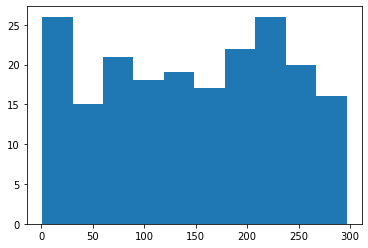

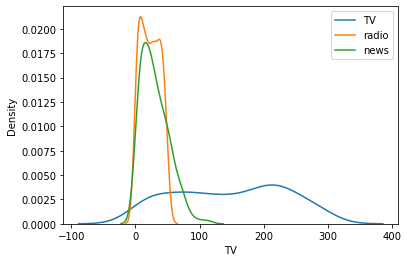

In [28]:

plt.hist(adv["TV"])
plt.show()
sns.kdeplot(adv["TV"],label="TV") #kernal density plot to display how raw data is distributed
sns.kdeplot(adv["radio"],label="radio") 
sns.kdeplot(adv["newspaper"],label="news") 
plt.legend()
plt.show()


In [32]:
adv["TV"][0]
#or
adv.TV[0]

230.1

In [34]:
adv.TV.std()

85.8542363149081

In [38]:
(adv["TV"][0]-adv["TV"].mean())/adv["TV"].std()

0.9674245973763037

In [41]:
from sklearn.preprocessing import scale

In [50]:
scl=scale(adv)
scl_data=pd.DataFrame(scl,columns=adv.columns)
scl_data

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


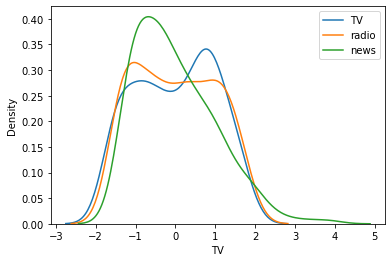

In [51]:
sns.kdeplot(scl_data["TV"],label="TV") #kernal density plot to display how raw data is distributed
sns.kdeplot(scl_data["radio"],label="radio") 
sns.kdeplot(scl_data["newspaper"],label="news") 
plt.legend()
plt.show()

In [52]:
adv.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [54]:
scl_data.mean().round()

TV           0.0
radio       -0.0
newspaper    0.0
sales       -0.0
dtype: float64

In [55]:
scl_data.std().round()
#standard format mean=0 and var=1

TV           1.0
radio        1.0
newspaper    1.0
sales        1.0
dtype: float64

### 2 . Data Range
* done using column wise or label wise or feature wize
* Scale data by compressing it into a fixed data
* One of the biggest usecase for this is when compressing into range [0,1]
* MinMaxScaler
* (x-dmin)/(dmax-dmin)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
mnscl=MinMaxScaler()
mnscale=mnscl.fit_transform(adv)
mnscale

array([[0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.0557998 , 0.92540323, 0.60686016, 0.30314961],
       [0.50997633, 0.83266129, 0.51187335, 0.66535433],
       [0.60906324, 0.21774194, 0.51099384, 0.44488189],
       [0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.67331755, 0.05241935, 0.18381706, 0.35433071],
       [0.2211701 , 0.11693548, 0.21020229, 0.27559055],
       [0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.32735881, 0.15322581, 0.06068602, 0.31889764],
       [0.68785932, 0.66330645, 0.40193492, 0.68503937],
       [0.65843761, 0.96169355, 0.46262093, 0.81889764],
       [0.22691917, 0.73790323, 1.        , 0.42913386],
       [0.94927291, 0.7983871 ,

In [61]:
mnscale.min()

0.0

In [62]:
mnscale.max()

1.0

In [63]:
adv.max()

TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64

In [64]:
adv.min()

TV           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64

### 3.Normalizing Data
* scaling is done based on individual rows
* want to scale the individual data observations (i.e rows)
* used in classification problemns and data mining
* when clustering data we need to apply L2 normalization to each row
* L2 normalization is applied to particular row of data array
* L2 norm of a row is squareroot of sum of squared values for the row

In [65]:
home=pd.read_csv("HomeBuyer.csv")
home

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [66]:
from sklearn.preprocessing import Normalizer

In [72]:
norm=Normalizer()
nor_data=norm.fit_transform(home)
nor_data

array([[9.99999500e-04, 9.99999500e-01, 0.00000000e+00],
       [1.74999732e-03, 9.99998469e-01, 0.00000000e+00],
       [6.04651052e-04, 9.99999817e-01, 0.00000000e+00],
       ...,
       [2.49999218e-03, 9.99996874e-01, 4.99998437e-05],
       [1.09090844e-03, 9.99999405e-01, 0.00000000e+00],
       [1.36110985e-03, 9.99999073e-01, 2.77777520e-05]])

In [73]:
nor_data.min()

0.0

In [74]:
nor_data.max()
#normal scale performed in row wise where minmaxscale is column wise

0.9999999807797668

### Robust Scaling

* Data points which are significanbtly away from other data points - outliers
* deals with outliers
* Robust scale the data i.e avoid being affected by outliers
* Scaling is done using data's mean and interquartile range(IQR)
* here mean affected but meadian remains same 
* Substract the median from each data values and scale to iqr

In [75]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [77]:
from sklearn.preprocessing import RobustScaler

In [79]:
rscl=RobustScaler()

In [81]:
rscl=rscl.fit_transform(adv)

In [83]:
pd.DataFrame(rscl,columns=adv.columns)

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594
